In [ ]:
#EXTRA QUESTIONS 

In [47]:
import numpy as nd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


test_df= pd.read_csv('test_measure.csv')
sub_df= pd.read_csv('subject-info.csv')
merged_df = pd.merge(test_df, subject_df, on='ID', how='inner')

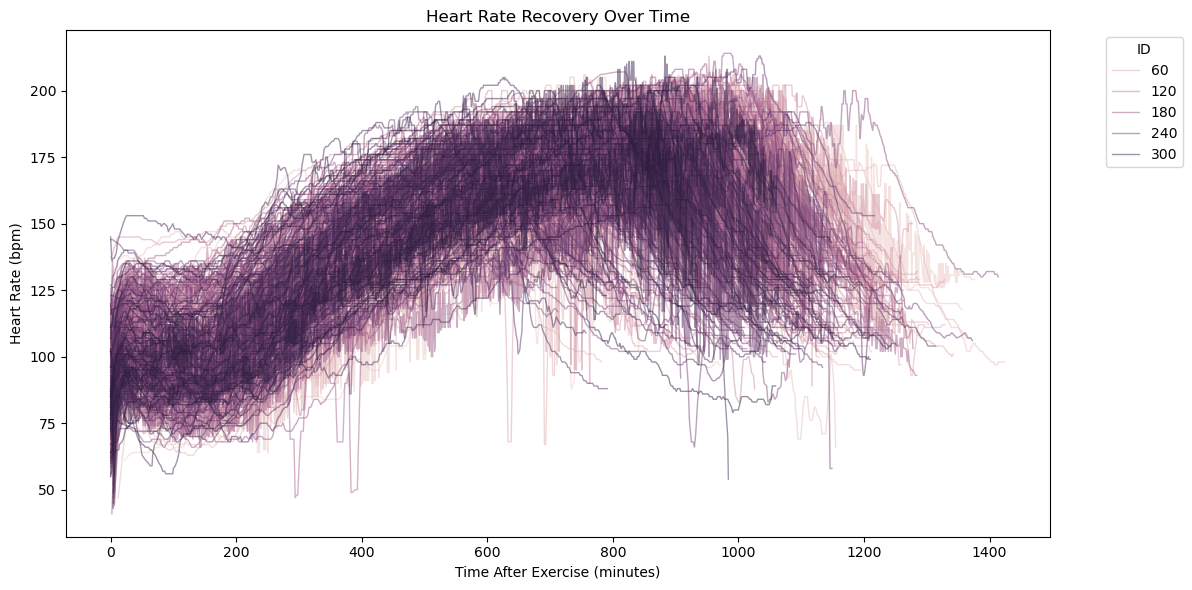

In [4]:
#1.Visualize heart rate recovery post-exercise phase and identify outliers.\\ GAYA3
import pandas as pd

#top_athletes = test_counts.sort_values(by='test_ID_x', ascending=False).head(20)
test_df['time_bin'] = test_df['time'].round()  

grouped_df =test_df.groupby(['ID', 'time_bin'], as_index=False)['HR'].mean()
# Plot HR recovery curves for each subject
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='time_bin', y='HR', hue='ID', alpha=0.5, linewidth=1, estimator='mean')

plt.title('Heart Rate Recovery Over Time')
plt.xlabel('Time After Exercise (minutes)')
plt.ylabel('Heart Rate (bpm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='ID', ncol=1)
plt.tight_layout()
plt.show()


In [ ]:
#2.Use a stacked bar chart to visualize test stage distribution per athlete) \\GAYA3
df= pd.DataFrame(merged_df)
df.set_index('ID', inplace=True)
df = df.loc[df.sum(axis=1).sort_values(ascending=False).index]
df.columns = [f'Stage {i+1}' for i in range(df.shape[1])]
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Plot
df.plot(kind='bar', stacked=True, colormap='tab20c', figsize=(8, 5))

plt.title("Test Stage Distribution Per Athlete")
plt.xlabel("Athlete")
plt.ylabel("Stage Completion (1=Completed)")
plt.legend(title='Test Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Athletes with only one test:
Empty DataFrame
Columns: [ID, test_ID_x]
Index: []

Athletes with multiple tests:
        ID  test_ID_x
0     15.0       6330
1     58.0       5910
2    308.0       5187
3     99.0       4752
4     72.0       3366
..     ...        ...
327  206.0        290
328  275.0        277
329  142.0        274
330  235.0        264
331  300.0        248

[332 rows x 2 columns]


C:\Users\gprab\AppData\Local\Temp\ipykernel_3516\2142150123.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_athletes, x='ID', y='test_ID_x', palette='viridis')


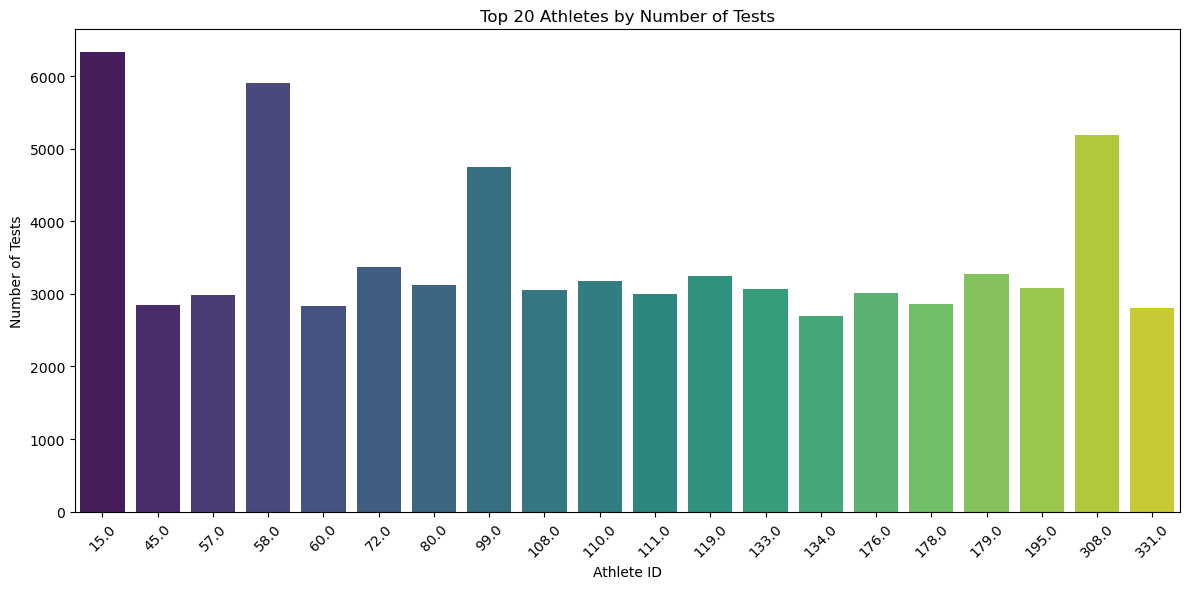

In [7]:
#3.Top 20 athletes by number of test taken with atheletes ID
test_counts = merged_df['ID'].value_counts().reset_index()
test_counts.columns = ['ID', 'test_ID_x']

# Show athletes with only one test
single_test_athletes = test_counts[test_counts['test_ID_x'] == 1]
print("Athletes with only one test:")
print(single_test_athletes)

# Show athletes with more than one test
multi_test_athletes = test_counts[test_counts['test_ID_x'] > 1]
print("\nAthletes with multiple tests:")
print(multi_test_athletes)

import seaborn as sns

# Sort and get top 20 athletes by number of tests
top_athletes = test_counts.sort_values(by='test_ID_x', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_athletes, x='ID', y='test_ID_x', palette='viridis')
plt.title('Top 20 Athletes by Number of Tests')
plt.xlabel('Athlete ID')
plt.ylabel('Number of Tests')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('c:\PYTHON/Top20Atheletes.png')
plt.show()

In [25]:
#4.What is the distribution of the number of graded exercise tests completed per athlete, and 
#what are the maximum, minimum, and median values across all athletes?

test_counts = merged_df['ID'].value_counts().reset_index()
test_counts.columns = ['ID', 'test_count']

print(test_counts['test_count'].describe())

max_tests = test_counts['test_count'].max()
min_tests = test_counts['test_count'].min()
median_tests = test_counts['test_count'].median()

print(f"Max tests per athlete: {max_tests}")
print(f"Min tests per athlete: {min_tests}")
print(f"Median tests per athlete: {median_tests}")


count     332.000000
mean      841.647590
std       857.027706
min       248.000000
25%       471.750000
50%       575.500000
75%       696.250000
max      6330.000000
Name: test_count, dtype: float64
Max tests per athlete: 6330
Min tests per athlete: 248
Median tests per athlete: 575.5


In [19]:
#5.Histogram: Show the distribution of test counts per athlete.
# Fix column names
test_counts = merged_df['ID'].value_counts().reset_index()
test_counts.columns = ['ID', 'test_count']  # Rename the columns properly


count     332.000000
mean      841.647590
std       857.027706
min       248.000000
25%       471.750000
50%       575.500000
75%       696.250000
max      6330.000000
Name: test_count, dtype: float64


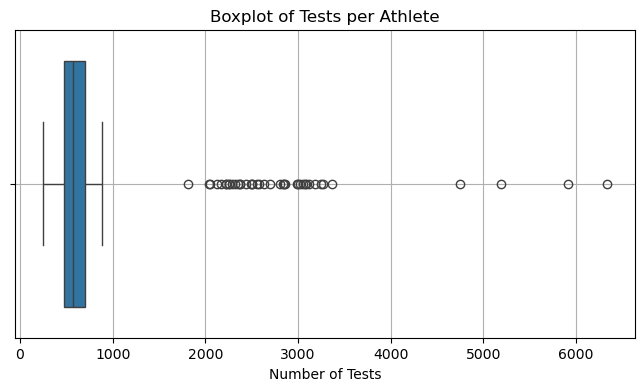

In [17]:
 #6.What does the boxplot of the number of graded exercise tests per athlete reveal about the distribution, including skewness, spread, and
#potential outliers?
#Boxplot Highlight skewness, outliers, and spread (including min/median/max).
plt.figure(figsize=(8, 4))
sns.boxplot(x=test_counts['test_count'])
plt.title('Boxplot of Tests per Athlete')
plt.xlabel('Number of Tests')
plt.grid(True)
plt.show()

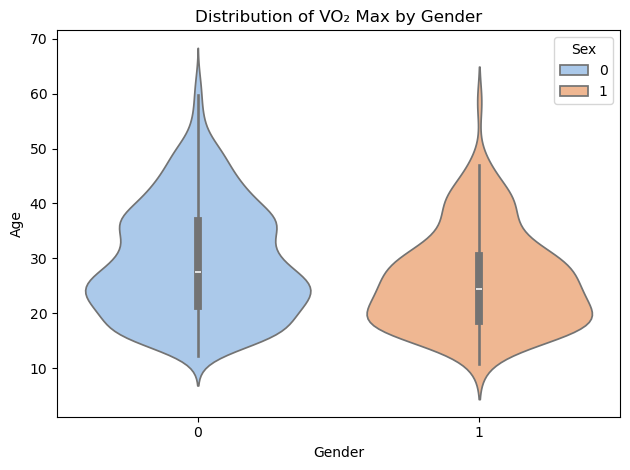

In [45]:
 #7.Violin chart of Age by Gender
sns.violinplot(data=sub_df, x='Sex', y='Age', hue='Sex', palette='pastel')
plt.title('Distribution of VO₂ Max by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.tight_layout()
plt.savefig('my_plot2.png')
plt.show()
